In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df=pd.read_excel('/content/drive/Shareddrives/데마 팀플 2/텀프로젝트/통합 Data/노인통합data3.xlsx')   #데이터셋 불러오기

In [4]:
df=df.drop(['시군구'],axis=1)
df

,노인 수(2021.05),노인 일자리수(2021.05),복지 공무원 수 (경기도 시군 조직 정보),경로당 수,노인복지관 수,사회복지관 수,양로시설 수,재가노인복지시설 수,무한돌봄센터 수,종합 복지시설 수,도시락배달,노령화지수 (%),노년부양비 (%),독거노인 가구 비율,빈곤율,"1인당 GRDP (만원,2016)",어르신무료급식소 수,노인빈곤 순위 소계,노인일자리 지원기관
0,16626.0,1988.0,98.0,166.0,1.0,0.0,11.0,5.0,1.0,184,6.0,266.70,37.43,12.4,27.3,2517.0,1.0,99.0,0.0
1,149289.0,6523.0,525.0,560.0,3.0,7.0,8.0,24.0,1.0,603,9.0,100.91,16.97,5.5,14.8,1875.0,13.0,84.0,1.0
2,9694.0,369.0,66.0,29.0,1.0,2.0,1.0,4.0,1.0,38,1.0,109.58,18.88,5.8,8.4,4600.0,1.0,25.0,0.0
3,42123.0,2128.0,162.0,119.0,1.0,3.0,0.0,5.0,1.0,129,4.0,100.74,17.69,6.3,15.3,1964.0,6.0,76.0,1.0
4,52902.0,1662.0,197.0,291.0,1.0,0.0,5.0,7.0,1.0,305,1.0,88.26,16.93,4.3,9.1,2359.0,1.0,24.0,0.0
5,27339.0,2207.0,119.0,131.0,0.0,2.0,1.0,14.0,1.0,149,4.0,100.44,16.88,5.7,18.1,2082.0,4.0,59.0,1.0
6,37160.0,2591.0,152.0,118.0,2.0,3.0,1.0,15.0,1.0,140,4.0,95.39,16.31,5.9,11.3,2185.0,5.0,24.0,2.0
7,60157.0,2462.0,197.0,345.0,2.0,1.0,3.0,13.0,1.0,365,2.0,69.01,16.91,4.6,15.9,2393.0,2.0,100.0,1.0
8,103718.0,4181.0,342.0,526.0,3.0,8.0,6.0,63.0,1.0,607,4.0,87.79,18.49,5.3,20.8,1309.0,8.0,101.0,1.0
9,19381.0,2081.0,109.0,110.0,1.0,0.0,0.0,19.0,1.0,131,1.0,164.89,28.09,10.4,30.7,1680.0,4.0,49.0,0.0


In [5]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

     |████████████████████████████████| 41 kB 306 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=4ce97693594df331673149129e902fb38d74b85e6d88387b318bf76b3bcc9805
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

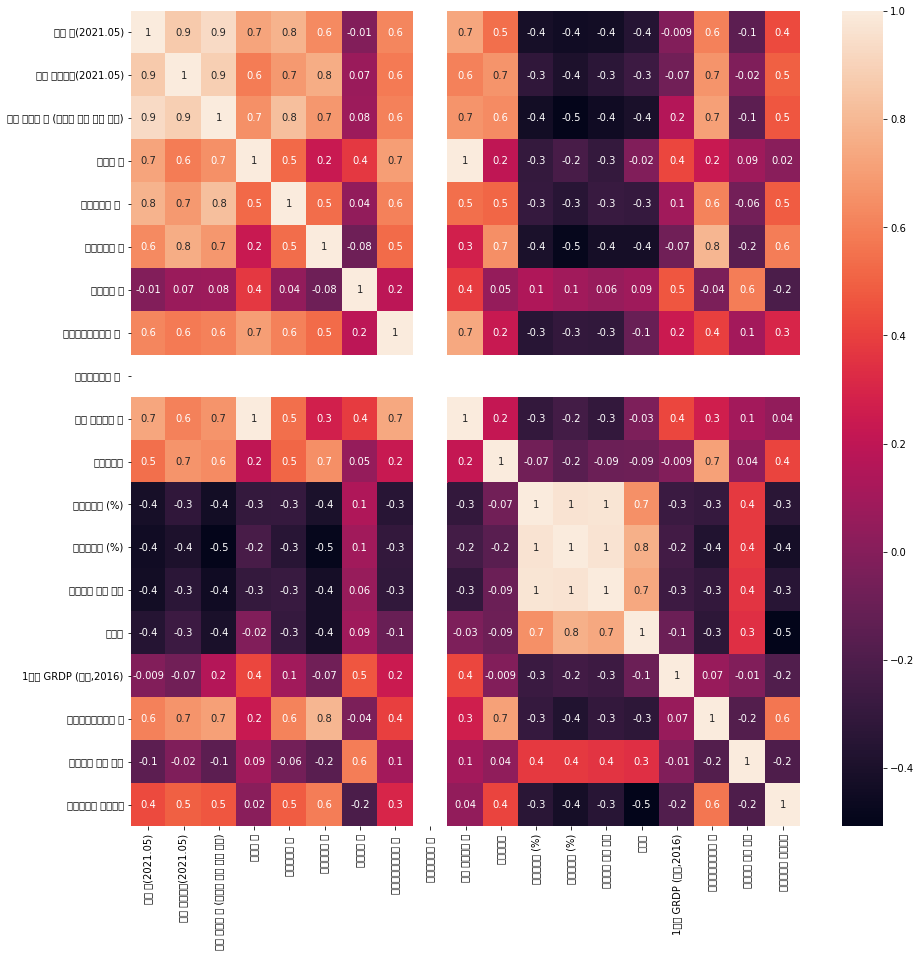

In [7]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1g')

In [8]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index = df.index)

In [9]:
data_scale

,노인 수(2021.05),노인 일자리수(2021.05),복지 공무원 수 (경기도 시군 조직 정보),경로당 수,노인복지관 수,사회복지관 수,양로시설 수,재가노인복지시설 수,무한돌봄센터 수,종합 복지시설 수,도시락배달,노령화지수 (%),노년부양비 (%),독거노인 가구 비율,빈곤율,"1인당 GRDP (만원,2016)",어르신무료급식소 수,노인빈곤 순위 소계,노인일자리 지원기관
0,-1.034868,-0.702289,-0.926799,-0.795639,-0.615719,-0.986600,1.122278,-0.997095,0.0,-0.799112,0.335144,2.807343,2.420274,2.422223,1.013676,-0.295415,-0.795281,1.063113,-0.838628
1,2.231519,2.566527,1.554099,1.281286,0.747659,1.474230,0.532607,0.474807,0.0,1.270199,1.095348,-0.262119,-0.425265,-0.399746,-0.689704,-0.766365,1.380046,0.607493,0.786214
2,-1.205545,-1.869260,-1.112721,-1.517819,-0.615719,-0.283506,-0.843294,-1.074564,0.0,-1.520160,-0.931863,-0.101601,-0.159626,-0.277052,-1.561834,1.232607,-0.795281,-1.184611,-0.838628
3,-0.407089,-0.601378,-0.554955,-1.043394,-0.615719,0.068041,-1.039851,-0.997095,0.0,-1.070740,-0.171659,-0.265266,-0.325129,-0.072561,-0.621569,-0.701078,0.111105,0.364496,0.786214
4,-0.141691,-0.937269,-0.351603,-0.136716,-0.615719,-0.986600,-0.057065,-0.842158,0.0,-0.201530,-0.931863,-0.496323,-0.430828,-0.890523,-1.466445,-0.411319,-0.795281,-1.214986,-0.838628
5,-0.771096,-0.544435,-0.804788,-0.980137,-1.297409,-0.283506,-0.843294,-0.299878,0.0,-0.971966,-0.171659,-0.270820,-0.437782,-0.317950,-0.240012,-0.614517,-0.251449,-0.151873,0.786214
6,-0.529286,-0.267648,-0.613056,-1.048665,0.065970,0.068041,-0.843294,-0.222410,0.0,-1.016414,-0.171659,-0.364317,-0.517057,-0.236154,-1.166650,-0.538959,-0.070172,-1.214986,2.411055
7,0.036939,-0.360631,-0.351603,0.147939,0.065970,-0.635053,-0.450179,-0.377347,0.0,0.094791,-0.678462,-0.852720,-0.433610,-0.767829,-0.539807,-0.386377,-0.614004,1.093487,0.786214
8,1.109484,0.878420,0.490857,1.102059,0.747659,1.825777,0.139492,3.496080,0.0,1.289954,-0.171659,-0.505024,-0.213866,-0.481542,0.127918,-1.181565,0.473660,1.123862,0.786214
9,-0.967035,-0.635255,-0.862888,-1.090836,-0.615719,-0.986600,-1.039851,0.087464,0.0,-1.060862,-0.931863,0.922417,1.121284,1.604261,1.476995,-0.909411,-0.251449,-0.455620,-0.838628


In [10]:
data_scale.mean(axis=0).head()

노인 수(2021.05)             -1.432546e-17
노인 일자리수(2021.05)          -8.774343e-17
복지 공무원 수 (경기도 시군 조직 정보)    8.595275e-17
경로당 수                     -5.013910e-17
노인복지관 수                   -8.237139e-17
dtype: float64

In [11]:
data_scale.cov() # 공분산행렬

,노인 수(2021.05),노인 일자리수(2021.05),복지 공무원 수 (경기도 시군 조직 정보),경로당 수,노인복지관 수,사회복지관 수,양로시설 수,재가노인복지시설 수,무한돌봄센터 수,종합 복지시설 수,도시락배달,노령화지수 (%),노년부양비 (%),독거노인 가구 비율,빈곤율,"1인당 GRDP (만원,2016)",어르신무료급식소 수,노인빈곤 순위 소계,노인일자리 지원기관
노인 수(2021.05),1.033333,0.895517,0.964089,0.747463,0.804824,0.649936,-0.011055,0.637932,0.0,0.755640,0.562028,-0.428190,-0.454811,-0.449079,-0.366490,-0.009101,0.624568,-0.148949,0.447928
노인 일자리수(2021.05),0.895517,1.033333,0.914225,0.605202,0.708688,0.782810,0.075505,0.595216,0.0,0.622980,0.691025,-0.326975,-0.403334,-0.342532,-0.277771,-0.070919,0.692416,-0.024242,0.514611
복지 공무원 수 (경기도 시군 조직 정보),0.964089,0.914225,1.033333,0.677107,0.855443,0.703243,0.081858,0.620010,0.0,0.692032,0.656988,-0.449845,-0.517283,-0.461827,-0.417318,0.165529,0.734904,-0.151466,0.484213
경로당 수,0.747463,0.605202,0.677107,1.033333,0.541988,0.247247,0.386807,0.727338,0.0,1.031603,0.209688,-0.307579,-0.232333,-0.309870,-0.019454,0.432134,0.247393,0.090130,0.016854
노인복지관 수,0.804824,0.708688,0.855443,0.541988,1.033333,0.554535,0.044087,0.622470,0.0,0.563849,0.529925,-0.300107,-0.358870,-0.287791,-0.304742,0.100649,0.626776,-0.066950,0.500223
사회복지관 수,0.649936,0.782810,0.703243,0.247247,0.554535,1.033333,-0.083513,0.547605,0.0,0.282988,0.674249,-0.411689,-0.503371,-0.434374,-0.437907,-0.075919,0.818521,-0.162663,0.611132
양로시설 수,-0.011055,0.075505,0.081858,0.386807,0.044087,-0.083513,1.033333,0.193972,0.0,0.399870,0.056288,0.144855,0.101985,0.062175,0.092540,0.480731,-0.037394,0.610568,-0.219784
재가노인복지시설 수,0.637932,0.595216,0.620010,0.727338,0.622470,0.547605,0.193972,1.033333,0.0,0.764385,0.237341,-0.355717,-0.313478,-0.317877,-0.106536,0.249626,0.408916,0.102751,0.314956
무한돌봄센터 수,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
종합 복지시설 수,0.755640,0.622980,0.692032,1.031603,0.563849,0.282988,0.399870,0.764385,0.0,1.033333,0.226310,-0.315163,-0.244763,-0.317203,-0.031053,0.432516,0.272948,0.103563,0.042556


In [12]:
# PCA 진행
pca = PCA(random_state=325)
X_p = pca.fit_transform(data_scale)

In [15]:
data_scale

,노인 수(2021.05),노인 일자리수(2021.05),복지 공무원 수 (경기도 시군 조직 정보),경로당 수,노인복지관 수,사회복지관 수,양로시설 수,재가노인복지시설 수,무한돌봄센터 수,종합 복지시설 수,도시락배달,노령화지수 (%),노년부양비 (%),독거노인 가구 비율,빈곤율,"1인당 GRDP (만원,2016)",어르신무료급식소 수,노인빈곤 순위 소계,노인일자리 지원기관
0,-1.034868,-0.702289,-0.926799,-0.795639,-0.615719,-0.986600,1.122278,-0.997095,0.0,-0.799112,0.335144,2.807343,2.420274,2.422223,1.013676,-0.295415,-0.795281,1.063113,-0.838628
1,2.231519,2.566527,1.554099,1.281286,0.747659,1.474230,0.532607,0.474807,0.0,1.270199,1.095348,-0.262119,-0.425265,-0.399746,-0.689704,-0.766365,1.380046,0.607493,0.786214
2,-1.205545,-1.869260,-1.112721,-1.517819,-0.615719,-0.283506,-0.843294,-1.074564,0.0,-1.520160,-0.931863,-0.101601,-0.159626,-0.277052,-1.561834,1.232607,-0.795281,-1.184611,-0.838628
3,-0.407089,-0.601378,-0.554955,-1.043394,-0.615719,0.068041,-1.039851,-0.997095,0.0,-1.070740,-0.171659,-0.265266,-0.325129,-0.072561,-0.621569,-0.701078,0.111105,0.364496,0.786214
4,-0.141691,-0.937269,-0.351603,-0.136716,-0.615719,-0.986600,-0.057065,-0.842158,0.0,-0.201530,-0.931863,-0.496323,-0.430828,-0.890523,-1.466445,-0.411319,-0.795281,-1.214986,-0.838628
5,-0.771096,-0.544435,-0.804788,-0.980137,-1.297409,-0.283506,-0.843294,-0.299878,0.0,-0.971966,-0.171659,-0.270820,-0.437782,-0.317950,-0.240012,-0.614517,-0.251449,-0.151873,0.786214
6,-0.529286,-0.267648,-0.613056,-1.048665,0.065970,0.068041,-0.843294,-0.222410,0.0,-1.016414,-0.171659,-0.364317,-0.517057,-0.236154,-1.166650,-0.538959,-0.070172,-1.214986,2.411055
7,0.036939,-0.360631,-0.351603,0.147939,0.065970,-0.635053,-0.450179,-0.377347,0.0,0.094791,-0.678462,-0.852720,-0.433610,-0.767829,-0.539807,-0.386377,-0.614004,1.093487,0.786214
8,1.109484,0.878420,0.490857,1.102059,0.747659,1.825777,0.139492,3.496080,0.0,1.289954,-0.171659,-0.505024,-0.213866,-0.481542,0.127918,-1.181565,0.473660,1.123862,0.786214
9,-0.967035,-0.635255,-0.862888,-1.090836,-0.615719,-0.986600,-1.039851,0.087464,0.0,-1.060862,-0.931863,0.922417,1.121284,1.604261,1.476995,-0.909411,-0.251449,-0.455620,-0.838628


In [17]:
# PCA 진행
pca = PCA(random_state=325)
X_p = pca.fit_transform(data_scale)

In [18]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

ValueError: ignored

In [19]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

NameError: ignored